In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 데이터 가져오기

In [2]:
# id 없이
train = pd.read_csv("C:/dataset/AIFrenz_Season1/train.csv", index_col = 'id')
test = pd.read_csv("C:/dataset/AIFrenz_Season1/test.csv", index_col = 'id')
sample_submission = pd.read_csv("C:/dataset/AIFrenz_Season1/sample_submission.csv")

In [5]:
# id 살려서
id_train = pd.read_csv('C:/dataset/AIFrenz_Season1/train.csv')
id_test = pd.read_csv("C:/dataset/AIFrenz_Season1/test.csv")

2. 데이터 살펴보기

In [47]:
# 사실 X14, X16, X19은 관측기가 고장나서 측정을 하지 못함
# ?????

In [56]:
train.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,1008.394171,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,3.546180,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,996.300000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,1006.300000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,1008.400000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,1010.900000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,1018.000000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


In [57]:
train.iloc[:, 10:22].describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.0,4752.000000,4752.0,4752.000000,4752.000000,4752.0,4752.000000,4752.000000
mean,1.006734,11.008479,68.209827,161.357639,0.0,174.346654,0.0,161.823864,1.377462,0.0,71.478872,1.138363
std,3.324415,10.873539,22.278053,98.787460,0.0,97.785811,0.0,115.943382,1.155024,0.0,21.830446,4.079039
min,0.000000,0.000000,16.400000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,19.700000,0.000000
25%,0.000000,0.020000,49.500000,69.225000,0.0,115.600000,0.0,33.875000,0.500000,0.0,53.075000,0.000000
50%,0.000000,7.690000,72.150000,182.600000,0.0,170.250000,0.0,190.450000,1.000000,0.0,74.200000,0.000000
75%,0.000000,22.190000,89.025000,228.925000,0.0,258.400000,0.0,253.125000,2.100000,0.0,92.600000,0.000000
max,18.500000,30.700000,97.900000,360.000000,0.0,359.900000,0.0,360.000000,8.900000,0.0,97.900000,21.000000


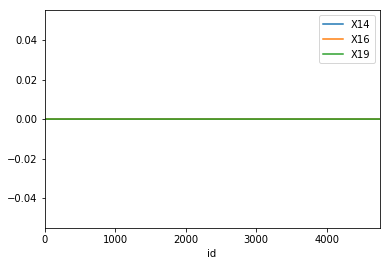

In [203]:
# 고장난 센서를 그래프로
id_train.plot(x = "id", y = id_train.columns[id_train.max() == id_train.min()])
plt.show()

In [58]:
# 고장나서 0만 출력하는 관측소 데이터를 컬럼에서 삭제해주는 함수
def same_min_max(df):
    return df.drop(df.columns[df.max() == df.min()], axis=1)

train2 = same_min_max(train)
test2  = same_min_max(test)

In [59]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 4751
Data columns (total 56 columns):
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X15    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null float64
X30    4752 non-null float64
X31    4752 non-null float64
X32    4752 non-null float64
X33    4752 non-null fl

In [60]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11520 entries, 4752 to 16271
Data columns (total 37 columns):
X00    11520 non-null float64
X01    11520 non-null float64
X02    11520 non-null float64
X03    11520 non-null float64
X04    11520 non-null float64
X05    11520 non-null float64
X06    11520 non-null float64
X07    11520 non-null float64
X08    11520 non-null float64
X09    11520 non-null float64
X10    11520 non-null float64
X11    11520 non-null float64
X12    11520 non-null float64
X13    11520 non-null float64
X15    11520 non-null float64
X17    11520 non-null float64
X18    11520 non-null float64
X20    11520 non-null float64
X21    11520 non-null float64
X22    11520 non-null float64
X23    11520 non-null float64
X24    11520 non-null float64
X25    11520 non-null float64
X26    11520 non-null float64
X27    11520 non-null float64
X28    11520 non-null float64
X29    11520 non-null float64
X30    11520 non-null float64
X31    11520 non-null float64
X32    11520 non-n

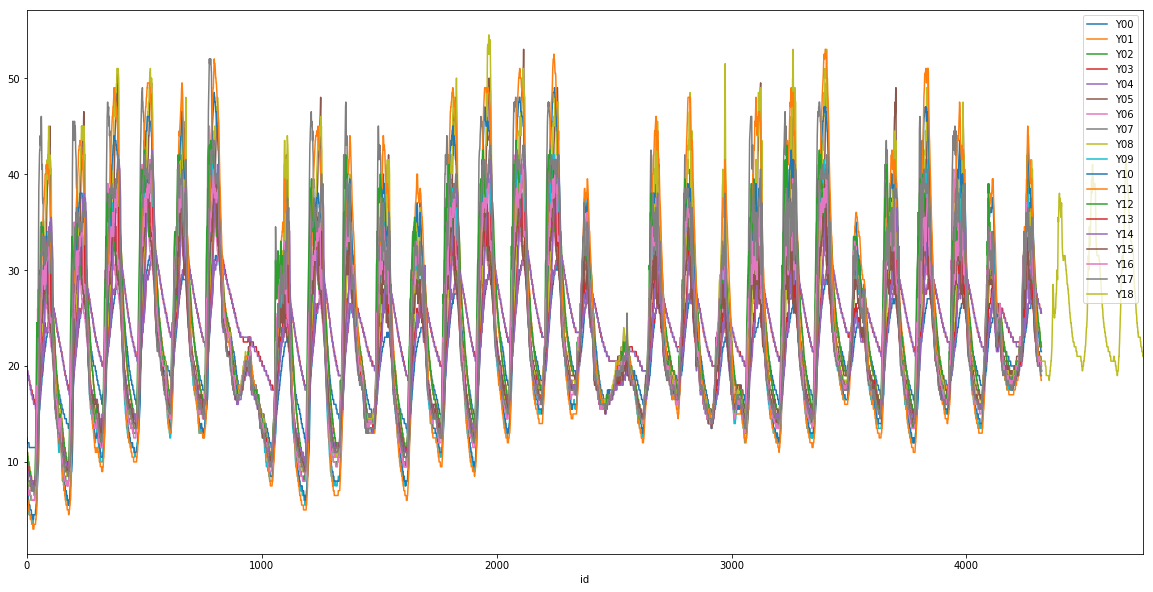

In [61]:
# 온도
train.loc[:,"Y00":"Y18"].plot(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

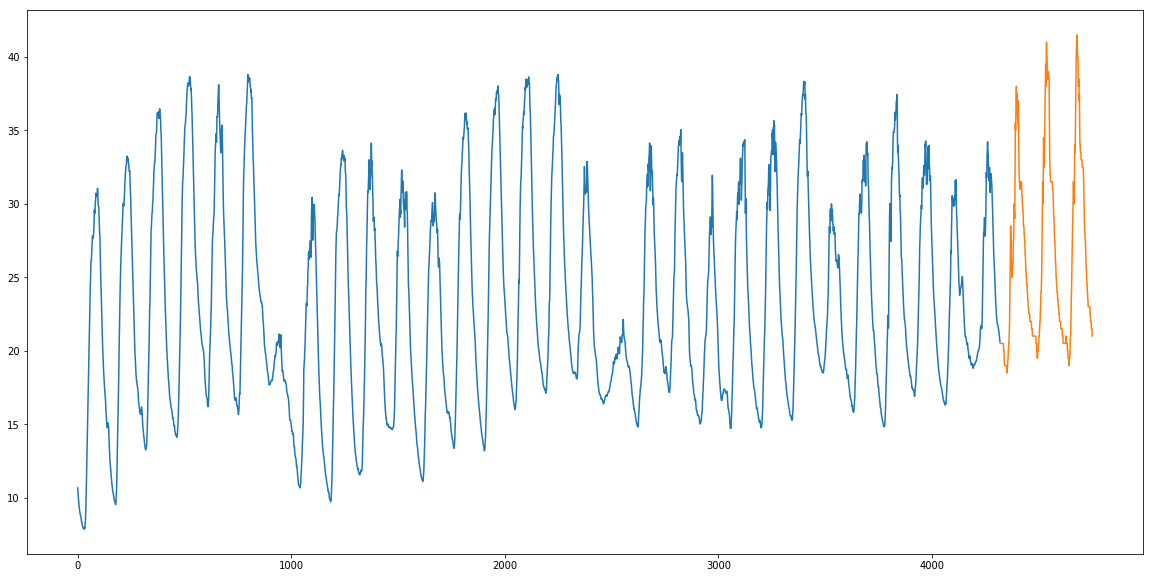

In [62]:
# 간편하게 타겟 변수를 만들기 위해 Y00 부터 Y17까지의 평균값과
# Y18 값을 이어주는 방법으로 타겟변수를 만든다.

plt.figure(figsize=(20,10))
mean_temp = train.loc[:, "Y00":"Y17"].mean(axis=1)
plt.plot(mean_temp)
plt.plot(train["Y18"])

3. 표준화 하기

In [63]:
# 표준화 함수 생성
def standardization(df):
    mean = np.mean(df)
    std = np.std(df)
    norm = (df - mean) / (std - 1e-07)
    return norm, mean, std

In [64]:
# 표준화는 주로 독립변수만 진행합니다. Y는 예측값이므로 표준화 하지 않습니다.

# X00부터 X39까지 이름만 X_name에 저장
X_name = train2.loc[:,"X00":"X39"].columns
X_name

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

In [169]:
# 학습용 데이터 표준화
train_X_norm, mean, std = standardization(train2[X_name]) 

# 테스트용 데이터 표준화
test_X_norm = (test2[X_name] - mean) / (std - 1e-07)

In [67]:
train_X_norm.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
0,-2.236613,0.053249,-0.289028,-0.911441,-0.286772,0.284592,0.174800,-2.160980,0.315249,0.396477,...,0.159935,-2.110001,-1.766809,0.298012,-1.015988,0.482067,-0.274975,0.577780,0.240728,-0.234601
1,-2.321591,0.083015,0.177501,0.477370,-0.286772,0.284592,0.174800,-2.183828,0.343658,0.424679,...,0.215689,-2.091884,-1.842695,0.298012,-1.015988,0.070297,-0.274975,0.582902,0.289731,-0.234601
2,-2.300347,0.112780,-0.382334,0.904697,-0.286772,0.255134,0.204183,-2.183828,0.372068,0.481084,...,0.271442,-2.146235,-1.956524,0.268945,-1.015988,0.269152,-0.274975,0.582902,0.311510,-0.234601
3,-2.300347,0.083015,-0.009111,-0.804610,-0.286772,0.255134,0.174800,-2.206676,0.343658,0.452881,...,0.350426,-2.200586,-2.013438,0.298012,-1.015988,0.056237,-0.274975,0.593145,0.344178,-0.234601
4,-2.342836,0.083015,-0.662251,0.263707,-0.286772,0.255134,0.204183,-2.206676,0.372068,0.452881,...,0.401533,-2.254937,-2.013438,0.298012,-1.015988,-0.336452,-0.274975,0.618753,0.371402,-0.234601


In [66]:
# #표준화된 X들과 id컬럼 병합
# train3 = pd.concat([train["id"], train_X_norm], axis=1) 
# test3  = pd.concat([test["id"] , test_X_norm] , axis=1)

KeyError: 'id'

In [170]:
train_X_norm.shape
test_X_norm.shape

(4752, 37)

(11520, 37)

4. id로 시간 변수 만들기 (minute) 

In [171]:
# 0부터 143까지 10분 단위로 반복되는 변수 minute
minute = (id_train.id%144).astype(int)

In [172]:
minute.shape

(4752,)

In [173]:
new_train = pd.concat([minute, train_X_norm], axis=1) 
new_train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
4747,139,-0.069662,-0.303940,-0.568945,-0.697778,-0.286772,-0.422397,-0.383472,0.009578,-0.366580,...,1.126324,-0.388886,-0.173206,-0.457735,0.930342,0.102435,-0.274975,0.838982,0.022938,-0.126302
4748,140,-0.069662,-0.303940,-0.942168,-0.804610,-0.286772,-0.451855,-0.383472,-0.013270,-0.366580,...,1.191369,-0.388886,-0.154235,-0.457735,0.930342,-0.469021,-0.274975,0.849226,0.050162,-0.126302
4749,141,-0.112151,-0.274175,-0.568945,-0.911441,-0.286772,-0.422397,-0.412855,-0.058966,-0.394989,...,1.140262,-0.370769,-0.154235,-0.457735,0.930342,0.459972,-0.274975,0.874834,0.039273,-0.126302
4750,142,-0.175885,-0.274175,-0.568945,-0.697778,-0.286772,-0.422397,-0.354090,-0.081814,-0.338170,...,1.135616,-0.388886,-0.135263,-0.428667,0.930342,0.919950,-0.274975,0.885077,0.088275,-0.126302
4751,143,-0.239619,-0.303940,-0.475639,-1.231936,-0.286772,-0.451855,-0.354090,-0.104662,-0.366580,...,1.112386,-0.388886,-0.097321,-0.399600,0.930342,-0.511203,-0.274975,0.926050,0.071941,-0.126302


In [174]:
minute2 = (id_test.id%144).astype(int)

In [184]:
re = test_X_norm.reset_index()

In [188]:
re.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,...,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,...,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,...,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601
3,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,-0.336784,...,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601
4,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,-0.336784,...,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601


In [187]:
re.drop(['id'], axis='columns', inplace=True)

In [189]:
new_test = pd.concat([minute2, re], axis=1) 
new_test

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,0,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,...,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,1,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,...,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,2,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,...,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601
3,3,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,...,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601
4,4,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,...,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601
5,5,-0.345842,-0.363472,-0.195722,-1.552431,-0.286772,-0.451855,-0.383472,-0.218902,-0.366580,...,1.158847,-0.461354,-0.211149,-0.457735,-1.015988,-2.093003,-0.274975,1.084819,0.202615,-0.234601
6,6,-0.345842,-0.393238,-0.475639,-0.697778,-0.286772,-0.481312,-0.412855,-0.241750,-0.394989,...,1.149555,-0.461354,-0.230121,-0.486802,-1.015988,-0.733157,-0.274975,1.095063,0.186281,-0.234601
7,7,-0.324597,-0.333706,-0.009111,-0.697778,-0.286772,-0.481312,-0.442238,-0.264598,-0.394989,...,1.223892,-0.497588,-0.306007,-0.486802,-1.015988,-0.671894,-0.274975,1.156522,0.202615,-0.234601
8,8,-0.367087,-0.333706,-0.289028,0.156875,-0.286772,-0.451855,-0.471621,-0.287446,-0.423399,...,1.274999,-0.570056,-0.343950,-0.486802,-1.015988,-0.492121,-0.274975,1.141157,0.235283,-0.234601
9,9,-0.367087,-0.333706,-0.009111,-1.552431,-0.286772,-0.451855,-0.442238,-0.287446,-0.394989,...,1.330752,-0.588173,-0.324978,-0.457735,-1.015988,-2.093003,-0.274975,1.177008,0.284286,-0.234601


In [191]:
new_test.shape

(11520, 38)

3. 모델 구성

In [192]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [193]:
t = train["Y18"].isna()
null_index = t[t==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)

In [71]:
null_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319],
           dtype='int64', name='id', length=4320)

In [194]:
X_train = new_train.copy()
y_train = train["Y18"]

In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 38 columns):
id     4752 non-null int32
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X15    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null float64
X30    4752 non-null float64
X31    4752 non-null float64
X32    4752 non-null floa

In [200]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 38 columns):
id     11520 non-null int32
X00    11520 non-null float64
X01    11520 non-null float64
X02    11520 non-null float64
X03    11520 non-null float64
X04    11520 non-null float64
X05    11520 non-null float64
X06    11520 non-null float64
X07    11520 non-null float64
X08    11520 non-null float64
X09    11520 non-null float64
X10    11520 non-null float64
X11    11520 non-null float64
X12    11520 non-null float64
X13    11520 non-null float64
X15    11520 non-null float64
X17    11520 non-null float64
X18    11520 non-null float64
X20    11520 non-null float64
X21    11520 non-null float64
X22    11520 non-null float64
X23    11520 non-null float64
X24    11520 non-null float64
X25    11520 non-null float64
X26    11520 non-null float64
X27    11520 non-null float64
X28    11520 non-null float64
X29    11520 non-null float64
X30    11520 non-null float64
X31    11520 non-null f

In [195]:
X_train.shape
y_train.shape

(4752, 38)

(4752,)

In [196]:
lgb_train = lgb.Dataset(X_train, label=y_train)

lgb_param = {
    "objective":"regression",
    "metrics":"mae",
    "learning_rate":0.01
}

# cross-validation
print("cv start")
cv_result = lgb.cv(
    lgb_param,
    lgb_train,
    num_boost_round=99999,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval=10 
)

print("train start")
lgb_model = lgb.train(
    lgb_param,
    lgb_train,
    num_boost_round=len(cv_result["l1-mean"])
)

83473
[3470]	cv_agg's l1: 0.326691 + 0.00785031
[3480]	cv_agg's l1: 0.326618 + 0.00784368
[3490]	cv_agg's l1: 0.326559 + 0.00785492
[3500]	cv_agg's l1: 0.326498 + 0.0078718
[3510]	cv_agg's l1: 0.326427 + 0.00788002
[3520]	cv_agg's l1: 0.326374 + 0.00788488
[3530]	cv_agg's l1: 0.326313 + 0.00788854
[3540]	cv_agg's l1: 0.326263 + 0.00790081
[3550]	cv_agg's l1: 0.326209 + 0.00790084
[3560]	cv_agg's l1: 0.326153 + 0.00789703
[3570]	cv_agg's l1: 0.326083 + 0.00789901
[3580]	cv_agg's l1: 0.326021 + 0.00790195
[3590]	cv_agg's l1: 0.325967 + 0.00790709
[3600]	cv_agg's l1: 0.32591 + 0.00789214
[3610]	cv_agg's l1: 0.325853 + 0.00788707
[3620]	cv_agg's l1: 0.325797 + 0.00787434
[3630]	cv_agg's l1: 0.325732 + 0.00788078
[3640]	cv_agg's l1: 0.325687 + 0.00788953
[3650]	cv_agg's l1: 0.325624 + 0.00789049
[3660]	cv_agg's l1: 0.325571 + 0.00789178
[3670]	cv_agg's l1: 0.325509 + 0.00789547
[3680]	cv_agg's l1: 0.325461 + 0.00789537
[3690]	cv_agg's l1: 0.325396 + 0.00789176
[3700]	cv_agg's l1: 0.325331 +

In [201]:
sample_submission["Y18"] = lgb_model.predict(new_test)
sample_submission.head()

,id,Y18
0,4752,20.142244
1,4753,20.168689
2,4754,20.115304
3,4755,19.814035
4,4756,19.603099


In [202]:
sample_submission.to_csv("C:/Users/jieun/jieunnnnn/study/AIFrenz/result2.csv", index = False)

XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(1000,2000,500),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print ('grid scores')
print (grid_search.grid_scores_)
print('best params')
print(grid_search.best_params_)
print('best score')
print (grid_search.best_score_)
print('best estimator')
print(grid_search.best_estimator_)

In [ ]:
xgbr = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.1, colsample_bylevel=1,  colsample_bytree=0.7, max_depth=3)
xgbr.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=True, early_stopping_rounds=5)

In [ ]:
sample_submission2 = pd.read_csv("C:/dataset/AIFrenz_Season1/sample_submission.csv")

In [0]:
sample_submission2["Y18"] = xgbr.predict(new_test)

In [ ]:
sample_submission2.to_csv("C:/Users/jieun/jieunnnnn/study/AIFrenz/result2_xgb2.csv", index = False) # 결과 가장 좋음 mse=5.374